--2024-03-25 13:33:50--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.15’

m4_survey_data.sqli 100%[===================>]  34.98M  45.7MB/s    in 0.8s    

2024-03-25 13:33:52 (45.7 MB/s) - ‘m4_survey_data.sqlite.15’ saved [36679680/36679680]



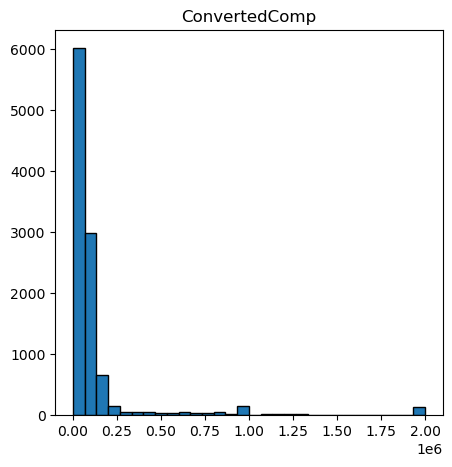

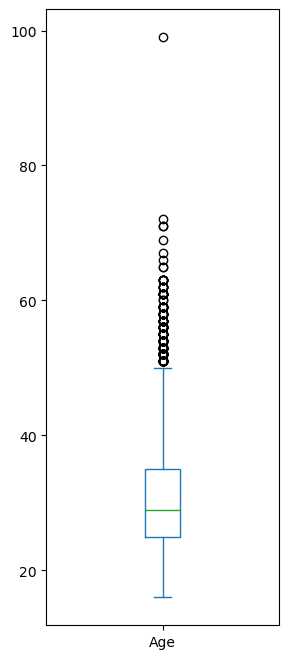

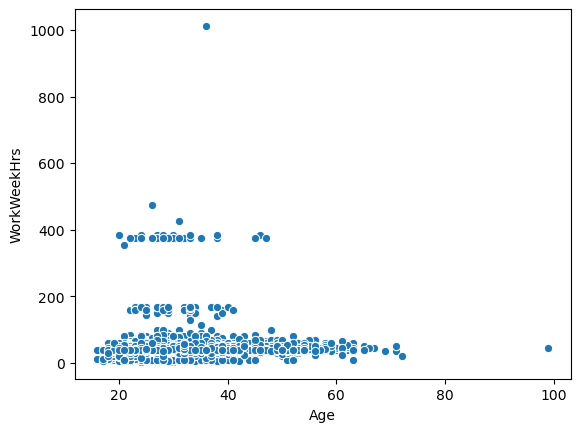

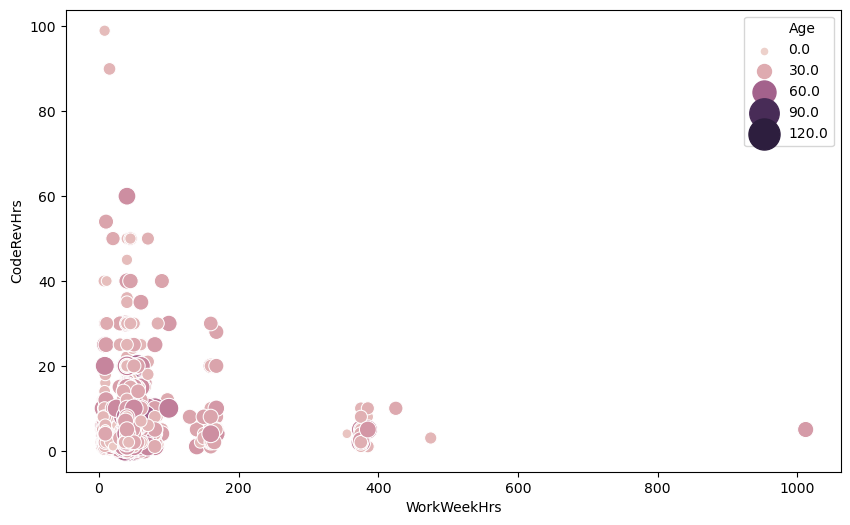

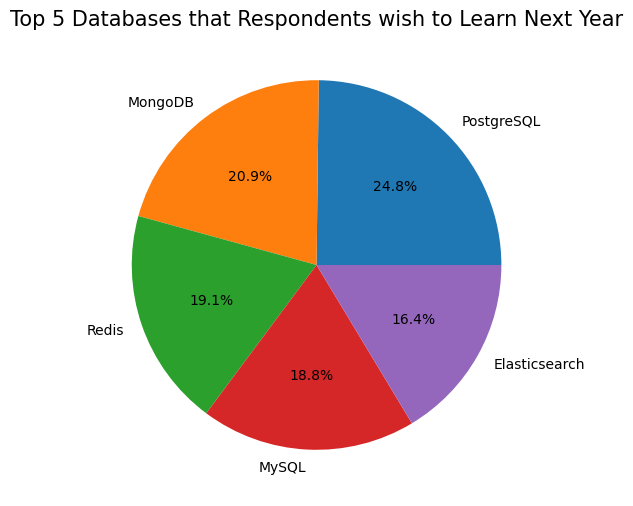

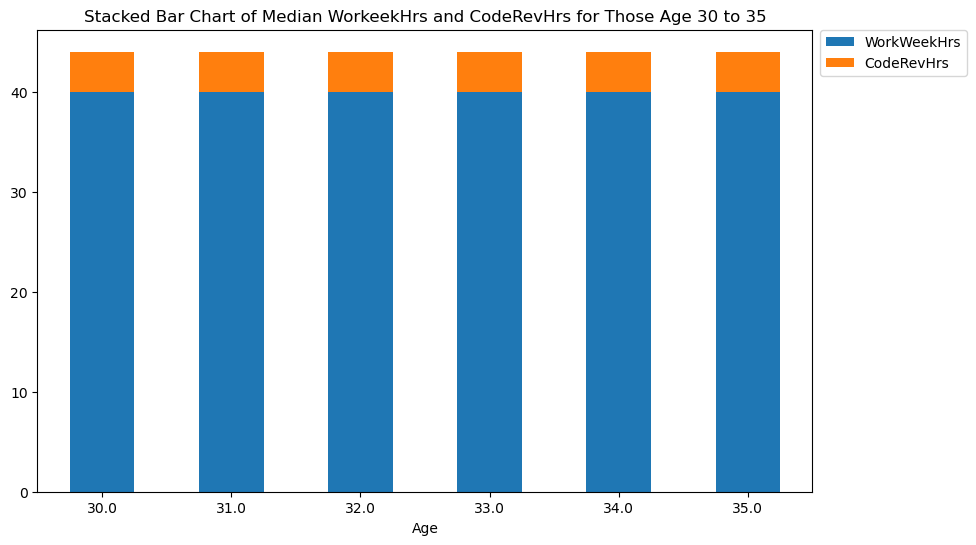

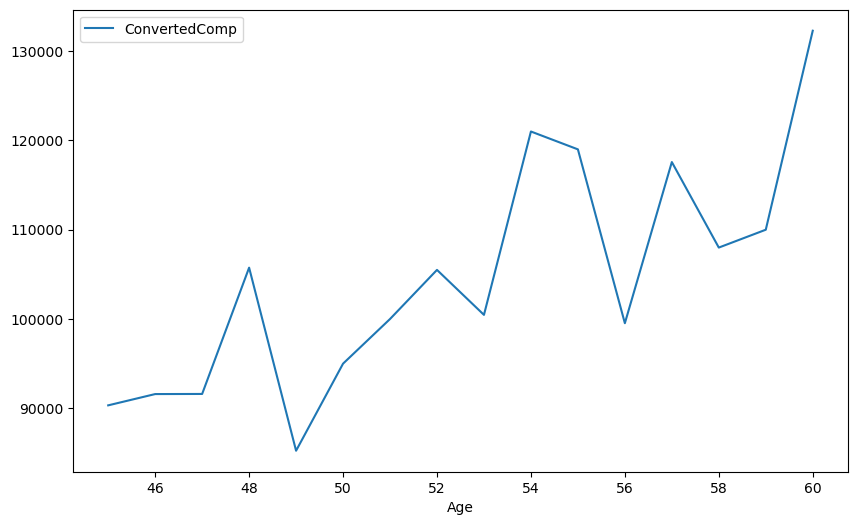

In [16]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
QUERY = """
SELECT ConvertedComp
FROM master
"""
ConvertedComp = pd.read_sql_query(QUERY,conn)
ConvertedComp.hist(bins=30, figsize=(5,5), edgecolor='black', grid=False)

QUERY = """
SELECT Age
FROM master
"""
Age = pd.read_sql_query(QUERY,conn)
Age.plot(kind='box', figsize=(3,8))
plt.show()

QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
Age_Work = pd.read_sql_query(QUERY,conn)
sns.scatterplot(data=Age_Work, x="Age", y="WorkWeekHrs");

QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""
Work_Code_Age = pd.read_sql_query(QUERY,conn)

plt.figure(figsize=(10,6))
sns.scatterplot(x="WorkWeekHrs", y="CodeRevHrs", size="Age", sizes=(20,500), hue="Age", data=Work_Code_Age);

QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) AS total
FROM DatabaseDesireNextYear 
GROUP BY(DatabaseDesireNextYear)
ORDER BY total DESC
LIMIT 5

"""
top5_db = pd.read_sql_query(QUERY,conn)

plt.figure(figsize=(6,6))
plt.pie(top5_db["total"], labels=top5_db["DatabaseDesireNextYear"].values, autopct="%.1f%%");
plt.title("Top 5 Databases that Respondents wish to Learn Next Year",fontsize= 15);

QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE AGE BETWEEN 30 AND 35
"""

Work_and_Code = pd.read_sql_query(QUERY,conn)
Work_and_Code = Work_and_Code.groupby("Age").median()

Work_and_Code.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Stacked Bar Chart of Median WorkeekHrs and CodeRevHrs for Those Age 30 to 35")
plt.xticks(rotation=0)
plt.legend(loc=(1.01, .9))
plt.show()

QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE AGE BETWEEN 45 AND 60
"""

convertedcomp = pd.read_sql_query(QUERY,conn)
convertedcomp = convertedcomp.groupby("Age").median()

plt.figure(figsize=(10,6))
sns.lineplot(data=convertedcomp);